# Simple neural newtworks model

Build a simeple neural newtworks model from scratch and use pytorch lightning. Inspired by Statquest.

In [32]:
# ! pip install numpy==1.24.1 # for torch to work
# ! pip install lightning

In [33]:
import torch # torch provides basic functions, from setting a random seed (for reproducability) to creating tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt ## matplotlib allows us to draw graphs.
import seaborn as sns 

## Basic NN

In [3]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(0.1), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b11 = nn.Parameter(torch.tensor(0.1), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)

    def forward(self, input):
        input_top_relu = input*self.w00 + self.b00
        top_relu = F.relu(input_top_relu)
        scaled_top_relu = top_relu * self.w01 + self.b01

        input_bot_relu = input*self.w10 + self.b10
        bot_relu = F.relu(input_bot_relu)
        scaled_bot_relu = bot_relu * self.w11 + self.b11

        input_final_relu = scaled_top_relu + scaled_bot_relu + self.final_bias

        output = F.relu(input_final_relu)

        return output

In [4]:
model = BasicNN()
for name, param in model.named_parameters():
    print(name, param)

w00 Parameter containing:
tensor(1.7000)
b00 Parameter containing:
tensor(-0.8500)
w01 Parameter containing:
tensor(-40.8000)
b01 Parameter containing:
tensor(0.1000)
w10 Parameter containing:
tensor(12.6000)
b10 Parameter containing:
tensor(0.)
w11 Parameter containing:
tensor(2.7000)
b11 Parameter containing:
tensor(0.1000)
final_bias Parameter containing:
tensor(-16)


### Check and graph model 

In [5]:
inputs = torch.linspace(start=0, end=1, steps=11)
inputs

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [6]:
outputs = model(inputs)
outputs

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])

<Axes: xlabel='None', ylabel='None'>

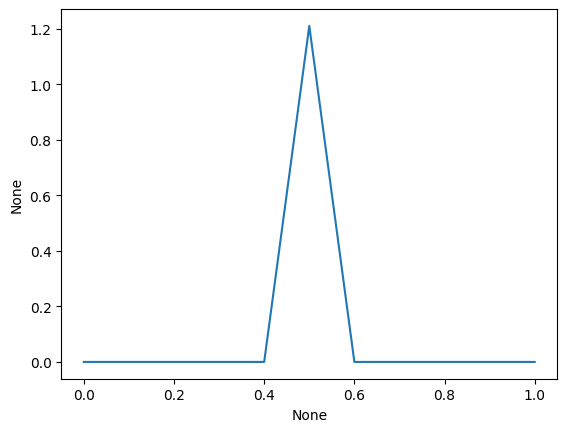

In [7]:
sns.lineplot(x=inputs, y=outputs)

## Basic NN for training

In [55]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-1.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-41.8), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(0.2), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(14.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.1), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.1), requires_grad=False)
        self.b11 = nn.Parameter(torch.tensor(0.3), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-12.0), requires_grad=True)

    def forward(self, input):
        input_top_relu = input*self.w00 + self.b00
        top_relu = F.relu(input_top_relu)
        scaled_top_relu = top_relu * self.w01 + self.b01

        input_bot_relu = input*self.w10 + self.b10
        bot_relu = F.relu(input_bot_relu)
        scaled_bot_relu = bot_relu * self.w11 + self.b11

        input_final_relu = scaled_top_relu + scaled_bot_relu + self.final_bias

        output = F.relu(input_final_relu)

        return output

In [56]:
model = BasicNN_train()
outputs = model(inputs)
outputs

tensor([0.0000, 4.0400, 0.0000], grad_fn=<ReluBackward0>)

<Axes: xlabel='None'>

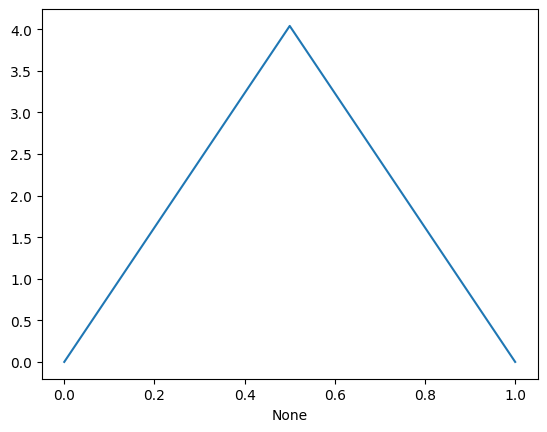

In [57]:
sns.lineplot(x=inputs, y=outputs.detach().numpy())

### Training loop

In [58]:
inputs = torch.tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000])
labels = torch.tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [59]:
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.01)

print("Final bias, before optimization: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = inputs[iteration]
    
        output_i = model(input_i)
    
        loss = (output_i - label_i)**2
        loss.backward()
    
        total_loss += float(loss)
    
    if (total_loss < 0.001):
        print("Num steps: " + str(epoc))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + " Final Bias: " + str(model.final_bias.data))

print("Total loss: " + str(total_loss))
print("Final bias, after optimization: " + str(model.final_bias.data))

Final bias, before optimization: tensor(-12.)

Step: 0 Final Bias: tensor(-12.3580)
Step: 1 Final Bias: tensor(-12.6978)
Step: 2 Final Bias: tensor(-13.0103)
Step: 3 Final Bias: tensor(-13.3066)
Step: 4 Final Bias: tensor(-13.5852)
Step: 5 Final Bias: tensor(-13.8470)
Step: 6 Final Bias: tensor(-14.0931)
Step: 7 Final Bias: tensor(-14.3244)
Step: 8 Final Bias: tensor(-14.5419)
Step: 9 Final Bias: tensor(-14.7463)
Step: 10 Final Bias: tensor(-14.9384)
Step: 11 Final Bias: tensor(-15.1190)
Step: 12 Final Bias: tensor(-15.2888)
Step: 13 Final Bias: tensor(-15.4484)
Step: 14 Final Bias: tensor(-15.5984)
Step: 15 Final Bias: tensor(-15.7394)
Step: 16 Final Bias: tensor(-15.8720)
Step: 17 Final Bias: tensor(-15.9966)
Step: 18 Final Bias: tensor(-16.1137)
Step: 19 Final Bias: tensor(-16.2353)
Step: 20 Final Bias: tensor(-16.3520)
Step: 21 Final Bias: tensor(-16.4640)
Step: 22 Final Bias: tensor(-16.5716)
Step: 23 Final Bias: tensor(-16.6748)
Step: 24 Final Bias: tensor(-16.7740)
Step: 25 Fina

<Axes: xlabel='None'>

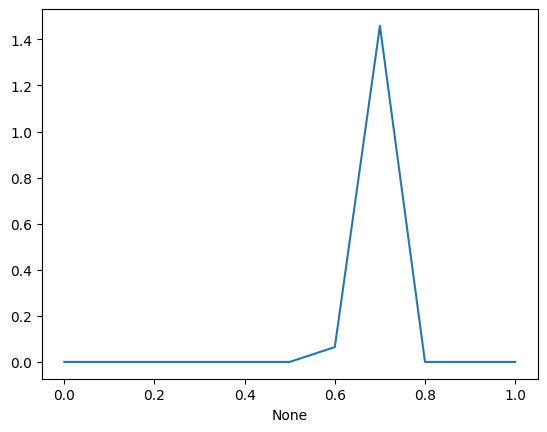

In [60]:
outputs = model(inputs)
sns.lineplot(x=inputs, y=outputs.detach().numpy())

## Lightning Basic NN

In [35]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(0.1), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        self.b11 = nn.Parameter(torch.tensor(0.1), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16), requires_grad=False)

    def forward(self, input):
        input_top_relu = input*self.w00 + self.b00
        top_relu = F.relu(input_top_relu)
        scaled_top_relu = top_relu * self.w01 + self.b01

        input_bot_relu = input*self.w10 + self.b10
        bot_relu = F.relu(input_bot_relu)
        scaled_bot_relu = bot_relu * self.w11 + self.b11

        input_final_relu = scaled_top_relu + scaled_bot_relu + self.final_bias

        output = F.relu(input_final_relu)

        return output

<Axes: xlabel='None', ylabel='None'>

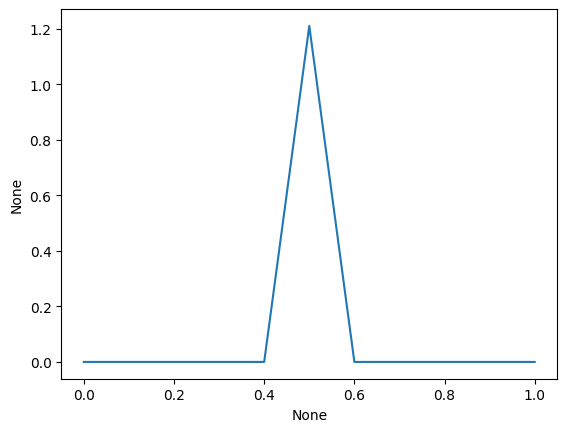

In [36]:
model = BasicLightning()
inputs = torch.linspace(start=0, end=1, steps=11)
outputs = model(inputs)

sns.lineplot(x=inputs, y=outputs)

## Basic Lightning for training

In [62]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(2.7), requires_grad=True)
        self.b00 = nn.Parameter(torch.tensor(-1.85), requires_grad=True)
        self.w01 = nn.Parameter(torch.tensor(-41.8), requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(0.2), requires_grad=True)

        self.w10 = nn.Parameter(torch.tensor(14.6), requires_grad=True)
        self.b10 = nn.Parameter(torch.tensor(0.1), requires_grad=True)
        self.w11 = nn.Parameter(torch.tensor(2.1), requires_grad=True)
        self.b11 = nn.Parameter(torch.tensor(0.3), requires_grad=True)

        self.final_bias = nn.Parameter(torch.tensor(-12.0), requires_grad=True)
        self.learning_rate = 0.01

    def forward(self, input):
        input_top_relu = input*self.w00 + self.b00
        top_relu = F.relu(input_top_relu)
        scaled_top_relu = top_relu * self.w01 + self.b01

        input_bot_relu = input*self.w10 + self.b10
        bot_relu = F.relu(input_bot_relu)
        scaled_bot_relu = bot_relu * self.w11 + self.b11

        input_final_relu = scaled_top_relu + scaled_bot_relu + self.final_bias

        output = F.relu(input_final_relu)
        
        return output

    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_index):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i)**2

        return loss

In [63]:
model = BasicLightningTrain()
outputs = model(inputs)
outputs

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.9740, 4.0400, 7.1060, 8.5000, 0.2800,
        0.0000, 0.0000], grad_fn=<ReluBackward0>)

<Axes: xlabel='None'>

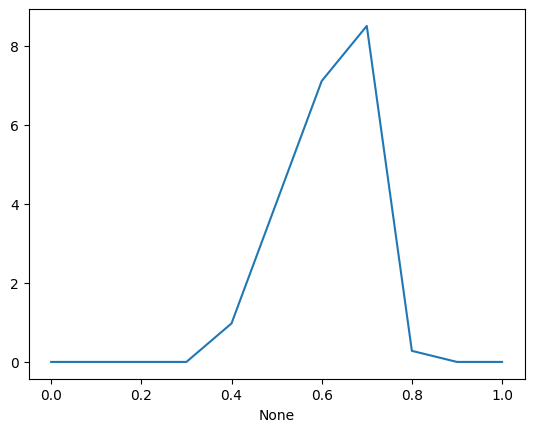

In [64]:
sns.lineplot(x=inputs, y=outputs.detach().numpy())

### Training

In [65]:
inputs = torch.tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000, 1.0000])
labels = torch.tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.2100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [71]:
trainer = L.Trainer(max_epochs=100)
tuner = L.pytorch.tuner.Tuner(trainer)
lr_find_results = tuner.lr_find(model,
                                train_dataloaders=dataloader,
                                min_lr=0.001,
                                max_lr=1.0,
                                early_stop_threshold=None)

new_lr = lr_find_results.suggestion()
print(f"lr_find suggests {new_lr} for the learning rate.")
                                        

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/envs/dl/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
/opt/anaconda3/envs/dl/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (11) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.

Finding best initial lr: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 227.09it/s]
Learning rate set to 0.002137962089502232
Restoring states from the checkpoint path at /Users/YaoSen/projects/dl-

lr_find suggests 0.002137962089502232 for the learning rate.


In [72]:
model.learning_rate = new_lr

In [73]:
trainer.fit(model, train_dataloaders=dataloader)


  | Name         | Type | Params | Mode
---------------------------------------------
  | other params | n/a  | 9      | n/a 
---------------------------------------------
9         Trainable params
0         Non-trainable params
9         Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode


Epoch 99: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 36.03it/s, v_num=3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 34.74it/s, v_num=3]


In [74]:
print(model.final_bias.data)

tensor(-12.0613)


<Axes: xlabel='None'>

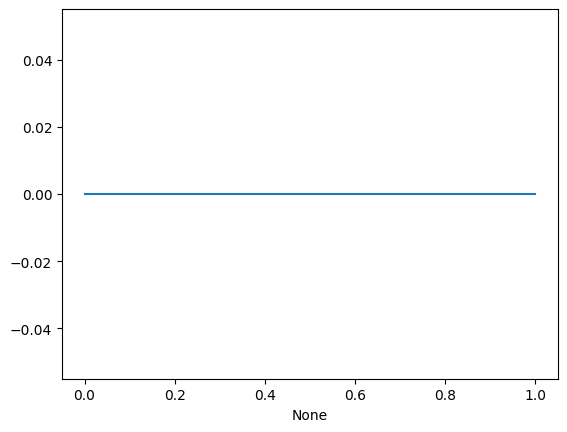

In [75]:
outputs = model(inputs)
sns.lineplot(x=inputs, y=outputs.detach().numpy())

## Summary
If I set all weights are trainable, the results are pretty horrible